In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 15)})

from tqdm.notebook import tqdm
tqdm().pandas()


# Load in the acousticbrainz dataset into the variable 'acousticbrainz'
acousticbrainz = pd.read_hdf(Path.cwd() / 'datasets' / 'acousticbrainzV2.h5')

C:\Users\Chris\Miniconda3\envs\thesis2\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
import scipy.stats

# Pooled variance metric
def get_variance(df):
    variances = df.groupby(level=0).var()
    samplesizes = df.groupby(level=0).size()
    
    a = variances.loc[variances.index.repeat(samplesizes)].reset_index(drop=True)
    return a

def pooled_variance(df):
    variances = df.groupby(level=0).var()
    samplesizes = df.groupby(level=0).size()

    pooledvariance = (variances.mul(samplesizes-1, axis=0).sum()) / (samplesizes.sum() - samplesizes.count())
    
    return pooledvariance

def get_ci95(df):
    se = df.sem()
    samplesizes = df.groupby(level=0).size()
    ci_95 = se * scipy.stats.t.ppf(0.975, samplesizes.sum()-1)
    
    return ci_95

# Some bit rates occur only once or twice, filter out any entries with uncommon bitrates
filtered = acousticbrainz.groupby('bit_rate').filter(lambda x: len(x) > 10000)

In [3]:
# Only keep entries with multiple submissions that share a bitrate
counts = filtered.groupby(level=0)['bit_rate'].value_counts() > 1
tokeep = [counts.loc[(idx, bitrate)] for idx, bitrate in zip(filtered.index.get_level_values(level=0), filtered['bit_rate'])]
filtered = filtered[tokeep]

In [4]:
quality_variances = filtered.groupby('bit_rate').progress_apply(lambda x: pooled_variance(x))
quality_variances_full = filtered.groupby('bit_rate').progress_apply(lambda x: get_variance(x))
quality_ci95 = filtered.groupby('bit_rate').progress_apply(lambda x: get_ci95(x))

In [5]:
quality_variances_full

(danceability, danceable)  (danceability, not_danceable)  \
bit_rate                                                                   
0        0                   1.194422e-11                   1.201089e-11   
         1                   1.194422e-11                   1.201089e-11   
         2                   7.482033e-10                   7.480772e-10   
         3                   7.482033e-10                   7.480772e-10   
         4                   2.071942e-11                   2.089064e-11   
...                                   ...                            ...   
320000   32512               3.185936e-10                   3.178418e-10   
         32513               3.185936e-10                   3.178418e-10   
         32514               7.343662e-06                   7.343653e-06   
         32515               7.343662e-06                   7.343653e-06   
         32516               7.343662e-06                   7.343653e-06   

                (gender, female)  (gender, male)  \
bit_rate                                           
0        0          0.000000e+00    0.000000e+00   
         1          0.000000e+00    0.000000e+00   
         2          4.779283e-08    4.779398e-08   
         3          4.779283e-08    4.779398e-08   
         4          3.409390e-08    3.407834e-08   
...                          ...             ...   
320000   32512      6.894556e-10    6.894556e-10   
         32513      6.894556e-10    6.894556e-10   
         32514      1.326582e-05    1.326586e-05   
         32515      1.326582e-05    1.326586e-05   
         32516      1.326582e-05    1.326586e-05   

                (genre_dortmund, alternative)  (genre_dortmund, blues)  \
bit_rate                                                                 
0        0                       4.156304e-07             4.125031e-08   
         1                       4.156304e-07             4.125031e-08   
         2                       3.451456e-21             4.125570e-21   
         3                       3.451456e-21             4.125570e-21   
         4                       2.678411e-11             7.439570e-14   
...                                       ...                      ...   
320000   32512                   2.035224e-07             8.465451e-09   
         32513                   2.035224e-07             8.465451e-09   
         32514                   1.129566e-08             8.024360e-05   
         32515                   1.129566e-08             8.024360e-05   
         32516                   1.129566e-08             8.024360e-05   

                (genre_dortmund, electronic)  (genre_dortmund, folkcountry)  \
bit_rate                                                                      
0        0                      2.829104e-09                   2.079936e-07   
         1                      2.829104e-09                   2.079936e-07   
         2                      1.776378e-15                   2.167488e-18   
         3                      1.776378e-15                   2.167488e-18   
         4                      4.547473e-11                   1.893320e-13   
...                                      ...                            ...   
320000   32512                  6.393762e-07                   5.219335e-09   
         32513                  6.393762e-07                   5.219335e-09   
         32514                  6.361942e-04                   6.876614e-05   
         32515                  6.361942e-04                   6.876614e-05   
         32516                  6.361942e-04                   6.876614e-05   

                (genre_dortmund, funksoulrnb)  (genre_dortmund, jazz)  ...  \
bit_rate                                                               ...   
0        0                       8.532294e-09            1.671848e-06  ...   
         1                       8.532294e-09            1.671848e-06  ...   
         2                       2.745906e-19  

In [6]:
quality_ci95

,"(danceability, danceable)","(danceability, not_danceable)","(gender, female)","(gender, male)","(genre_dortmund, alternative)","(genre_dortmund, blues)","(genre_dortmund, electronic)","(genre_dortmund, folkcountry)","(genre_dortmund, funksoulrnb)","(genre_dortmund, jazz)",...,"(tonal_atonal, atonal)","(tonal_atonal, tonal)","(voice_instrumental, instrumental)","(voice_instrumental, voice)",analysis_sample_rate,bit_rate,equal_loudness,length,lossless,replay_gain
bit_rate,,,,,,,,,,,,,,,,,,,,,
0,0.001505,0.001505,0.001221,0.001221,0.000314,0.000411,0.001356,0.000552,0.000029,0.000422,...,0.001451,0.001451,0.001549,0.001549,0.0,0.0,0.0,0.642025,0.000127,0.022050
128000,0.004086,0.004086,0.002909,0.002909,0.000877,0.000825,0.003343,0.001018,0.000081,0.000648,...,0.003955,0.003955,0.004518,0.004518,0.0,0.0,0.0,1.320663,0.000000,0.046411
160000,0.008449,0.008449,0.005862,0.005862,0.001568,0.001931,0.006672,0.002312,0.000146,0.001613,...,0.008068,0.008068,0.009075,0.009075,0.0,0.0,0.0,5.158738,0.000000,0.095774
192000,0.003557,0.003557,0.002515,0.002515,0.000689,0.000672,0.002633,0.000863,0.000064,0.000616,...,0.003440,0.003440,0.003764,0.003764,0.0,0.0,0.0,1.141770,0.000000,0.043449
256000,0.011848,0.011848,0.008309,0.008309,0.002981,0.002185,0.010520,0.002610,0.000215,0.002828,...,0.011608,0.011608,0.012510,0.012510,0.0,0.0,0.0,3.521243,0.000000,0.142275
320000,0.004331,0.004331,0.003097,0.003097,0.000850,0.000876,0.003409,0.001232,0.000076,0.000691,...,0.004096,0.004096,0.004491,0.004491,0.0,0.0,0.0,1.229754,0.000000,0.048381


In [7]:
filtered['bit_rate'].value_counts()

0         255740
192000     45830
128000     35085
320000     32517
160000      8221
256000      4153
Name: bit_rate, dtype: int64

In [8]:
filtered

(danceability, danceable)  \
00000baf-9215-483a-8900-93756eaf1cfc 0               9.999093e-01   
                                     1               9.999142e-01   
00007bab-7268-41c4-9d5c-c335c3a26f7c 0               3.000001e-14   
                                     1               3.000001e-14   
00017a6b-8544-4f1b-a8da-2ff1f12a759b 0               9.960241e-01   
...                                                           ...   
fffe453c-b68b-4e43-9cef-b6767a587415 2               4.945789e-01   
                                     3               4.946274e-01   
                                     5               8.023580e-01   
ffffefa3-45ae-4f72-9177-523b316a6534 0               3.936251e-02   
                                     1               3.936261e-02   

                                        (danceability, not_danceable)  \
00000baf-9215-483a-8900-93756eaf1cfc 0                       0.000091   
                                     1                       0.000086   
00007bab-7268-41c4-9d5c-c335c3a26f7c 0                       1.000000   
                                     1                       1.000000   
00017a6b-8544-4f1b-a8da-2ff1f12a759b 0                       0.003976   
...                                                               ...   
fffe453c-b68b-4e43-9cef-b6767a587415 2                       0.505421   
                                     3                       0.505373   
                                     5                       0.197642   
ffffefa3-45ae-4f72-9177-523b316a6534 0                       0.960638   
                                     1                       0.960637   

                                        (gender, female)  (gender, male)  \
00000baf-9215-483a-8900-93756eaf1cfc 0          0.500000        0.500000   
                                     1          0.500000        0.500000   
00007bab-7268-41c4-9d5c-c335c3a26f7c 0          0.622127        0.377873   
                                     1          0.622127        0.377873   
00017a6b-8544-4f1b-a8da-2ff1f12a759b 0          0.955158        0.044842   
...                                                  ...             ...   
fffe453c-b68b-4e43-9cef-b6767a587415 2          0.474031        0.525969   
                                     3          0.473776        0.526224   
                                     5          0.416326        0.583674   
ffffefa3-45ae-4f72-9177-523b316a6534 0          0.189658        0.810342   
                                     1          0.189648        0.810352   

                                        (genre_dortmund, alternative)  \
00000baf-9215-483a-8900-93756eaf1cfc 0                   1.232104e-01   
                                     1                   1.222987e-01   
00007bab-7268-41c4-9d5c-c335c3a26f7c 0                   3.422823e-04   
                                     1                   3.297231e-04   
00017a6b-8544-4f1b-a8da-2ff1f12a759b 0                   4.422272e-08   
...                                                               ...   
fffe453c-b68b-4e43-9cef-b6767a587415 2                   5.021929e-03   
                                     3                   5.020816e-03   
                                     5                   6.733237e-03   
ffffefa3-45ae-4f72-9177-523b316a6534 0                   4.516886e-12   
                                     1                   4.516782e-12   

                                        (genre_dortmund, blues)  \
00000baf-9215-483a-8900-93756eaf1cfc 0             2.935420e-02   
                                     1             2.906697e-02   
00007bab-7268-41c4-9d5c-c335c3a26f7c 0             3.083101e-05   
                                     1             2.992833e-05   
00017a6b-8544-4f1b-a8da-2ff1f12a759b 0             4.724779e-08   
...                                                         ...   
fffe453c-b68b-4e43-9cef-b6767a587415 2             2.607801e-03   
        

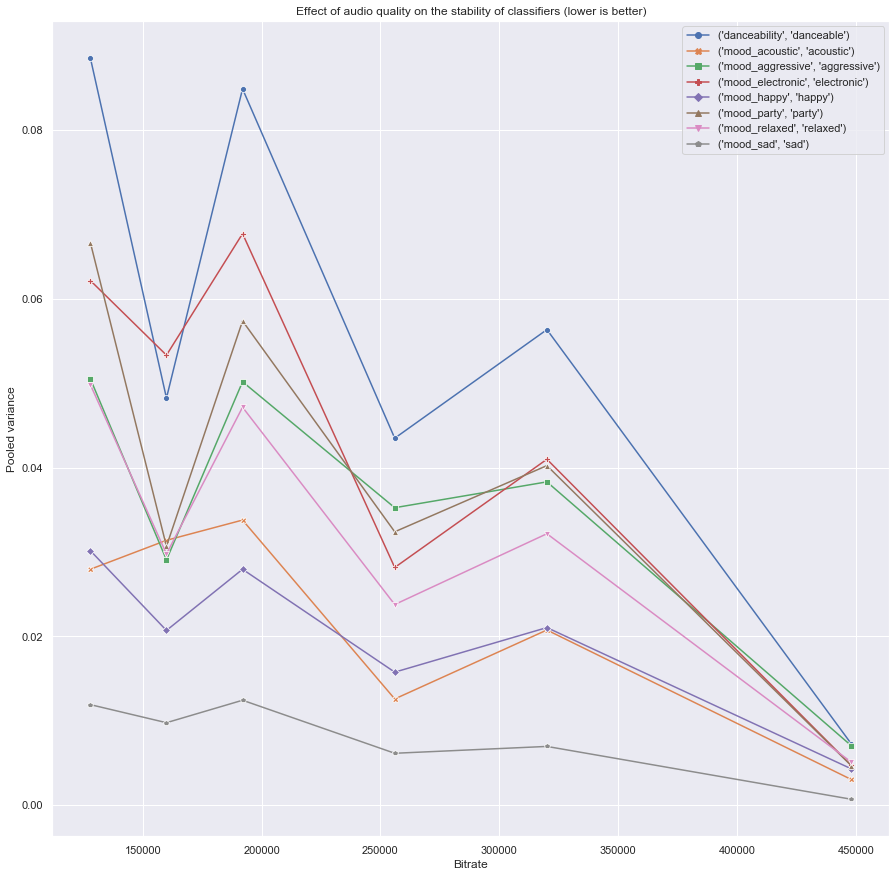

In [9]:
cols = [('danceability', 'danceable'), ('mood_acoustic', 'acoustic'), ('mood_aggressive', 'aggressive'),
('mood_electronic', 'electronic'), ('mood_happy', 'happy'), ('mood_party', 'party'),
('mood_relaxed', 'relaxed'), ('mood_sad', 'sad')]

quals = [0, 320000, 256000, 192000, 160000, 128000]

toplot = quality_variances.loc[quals, cols]
toplot_err = quality_ci95.loc[quals, cols]

# set lossless (0) to arbitrary value 448000 to be able to plot it
idx = toplot.index.tolist()
idx[0] = 448000
toplot.index = idx
toplot_err.index = idx

plt.title('Effect of audio quality on the stability of classifiers (lower is better)')
plt.xlabel('Bitrate')
plt.ylabel('Pooled variance')
sns.lineplot(hue=toplot.columns, data=toplot, dashes=False, markers=True)

In [10]:
toplot

,"(danceability, danceable)","(mood_acoustic, acoustic)","(mood_aggressive, aggressive)","(mood_electronic, electronic)","(mood_happy, happy)","(mood_party, party)","(mood_relaxed, relaxed)","(mood_sad, sad)"
448000,0.007263,0.003035,0.007042,0.004709,0.004299,0.004668,0.005096,0.000694
320000,0.056349,0.020750,0.038306,0.040986,0.021038,0.040231,0.032160,0.006953
256000,0.043480,0.012580,0.035243,0.028160,0.015755,0.032390,0.023769,0.006141
192000,0.084880,0.033778,0.050171,0.067721,0.027948,0.057376,0.047148,0.012427
160000,0.048238,0.031380,0.029059,0.053321,0.020697,0.030670,0.029761,0.009764
128000,0.088542,0.027949,0.050518,0.062167,0.030152,0.066663,0.049823,0.011905


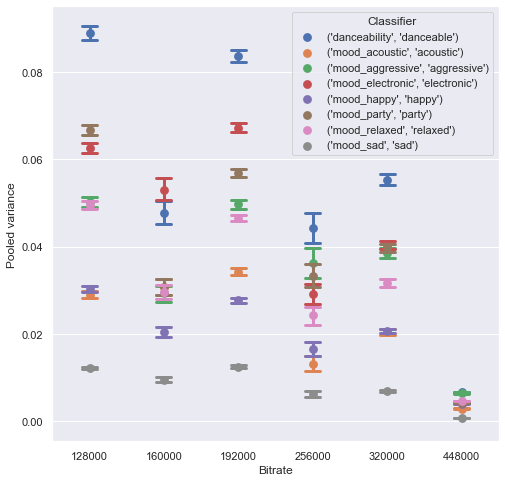

In [14]:
cols = [('danceability', 'danceable'), ('mood_acoustic', 'acoustic'), ('mood_aggressive', 'aggressive'),
('mood_electronic', 'electronic'), ('mood_happy', 'happy'), ('mood_party', 'party'),
('mood_relaxed', 'relaxed'), ('mood_sad', 'sad')]

toplot = quality_variances_full[cols].reset_index().drop(labels='level_1', axis=1)

# set lossless (0) to arbitrary value 448000 to be able to plot it
toplot['bit_rate'] = toplot['bit_rate'].replace(to_replace=0, value=448000)

toplot = toplot.melt(id_vars=['bit_rate'])
toplot.columns = ['Bitrate', 'Classifier', 'Pooled variance']

plt.figure(figsize=(8,8))
#plt.title('Effect of audio quality on the stability of classifiers (lower is better)')
sns.pointplot(data=toplot, x='Bitrate', y='Pooled variance', hue='Classifier', ci=95, errwidth=3, capsize=.2,
                       dodge=False,
                       join=False)

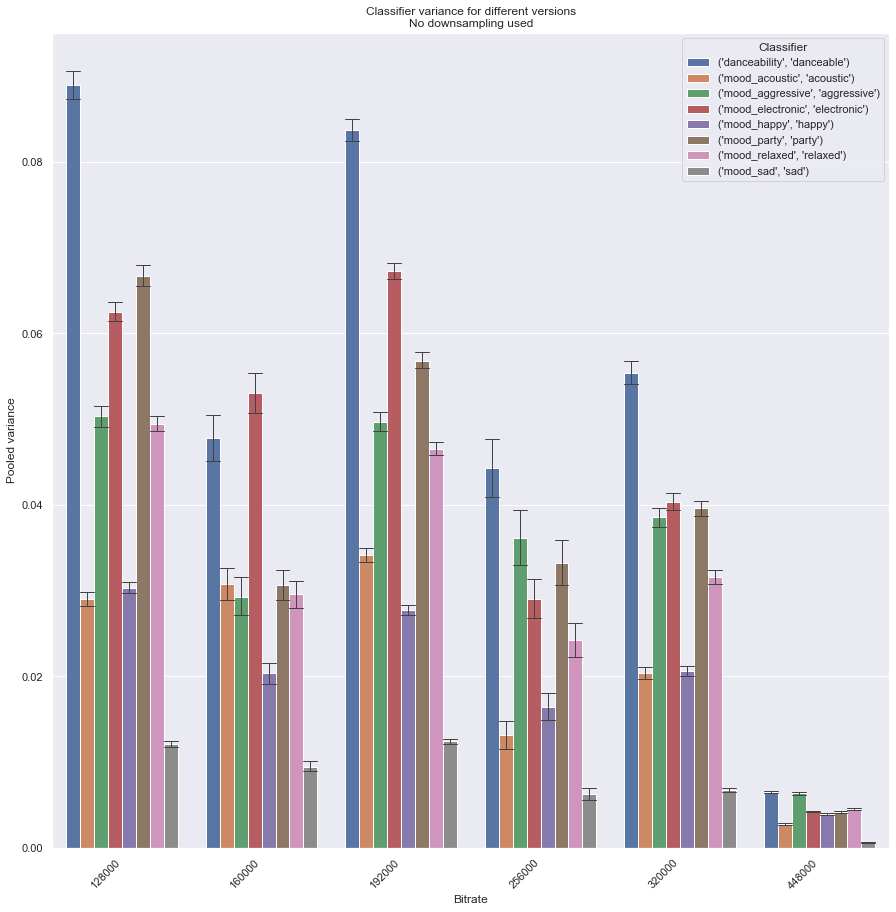

In [12]:
plt.figure()
ax = sns.barplot(data=toplot, x='Bitrate', y='Pooled variance', hue='Classifier', errwidth=1, capsize=.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title(f"Classifier variance for different versions\nNo downsampling used")
plt.show()